In [1]:
import numpy as np

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/azhad56/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from keras.datasets import imdb

In [5]:
((X_train,y_train),(X_test,y_test)) = imdb.load_data(num_words=10000)

In [6]:
len(X_train)

25000

In [7]:
len(X_test)

25000

In [8]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
print(len(X_train[0]))

218


In [10]:
word_index = imdb.get_word_index()

In [11]:
# print(word_index)

In [12]:
print(len(word_index))

88584


In [13]:
index_word = dict([value,key] for key,value in word_index.items())

In [14]:
# index_word

In [15]:
actual_review = ' '.join([index_word.get(index-3,'?') for index in X_train[0]])

In [16]:
# actual_review

In [17]:
len(X_train[0])

218

In [18]:
len(nltk.word_tokenize(actual_review))

222

In [19]:
def vectorize_sentence(sentences,dim=10000):
    outputs = np.zeros((len(sentences),dim))
    for i,word_index in enumerate(sentences):
        outputs[i,word_index] = 1
        if i%1000==0:
            print("{} sentence completed".format(i))
    return outputs

In [20]:
X_train = vectorize_sentence(X_train)
X_test = vectorize_sentence(X_test)

0 sentence completed
1000 sentence completed
2000 sentence completed
3000 sentence completed
4000 sentence completed
5000 sentence completed
6000 sentence completed
7000 sentence completed
8000 sentence completed
9000 sentence completed
10000 sentence completed
11000 sentence completed
12000 sentence completed
13000 sentence completed
14000 sentence completed
15000 sentence completed
16000 sentence completed
17000 sentence completed
18000 sentence completed
19000 sentence completed
20000 sentence completed
21000 sentence completed
22000 sentence completed
23000 sentence completed
24000 sentence completed
0 sentence completed
1000 sentence completed
2000 sentence completed
3000 sentence completed
4000 sentence completed
5000 sentence completed
6000 sentence completed
7000 sentence completed
8000 sentence completed
9000 sentence completed
10000 sentence completed
11000 sentence completed
12000 sentence completed
13000 sentence completed
14000 sentence completed
15000 sentence completed
1

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
X_test.shape

(25000, 10000)

In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
print(y_train.shape,y_test.shape)

(25000,) (25000,)


In [ ]:
y_train[0]

1

In [ ]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
from keras import models
from keras.layers import Dense

In [ ]:
model = models.Sequential()

In [ ]:
model.add(Dense(16,activation='relu',input_shape = (10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_val = X_train[:5000]
y_val = y_train[:5000]


In [ ]:
X_train_new = X_train[5000:]
y_train_new = y_train[5000:]

In [ ]:
hist = model.fit(X_train_new,y_train_new,epochs=20,batch_size=512,validation_data=(X_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 76us/step - loss: 2.4962e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9972
Epoch 2/20
20000/20000 [==============================] - 2s 77us/step - loss: 2.3308e-04 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9970
Epoch 3/20
20000/20000 [==============================] - 2s 77us/step - loss: 2.1862e-04 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 0.9970
Epoch 4/20
20000/20000 [==============================] - 2s 77us/step - loss: 2.0807e-04 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 0.9970
Epoch 5/20
20000/20000 [==============================] - 2s 77us/step - loss: 1.9411e-04 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 0.9968
Epoch 6/20
20000/20000 [==============================] - 2s 77us/step - loss: 1.8253e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9966
Epoch 7/20
20000/20000 [=====================

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
h = hist.history

Text(0, 0.5, 'loss')

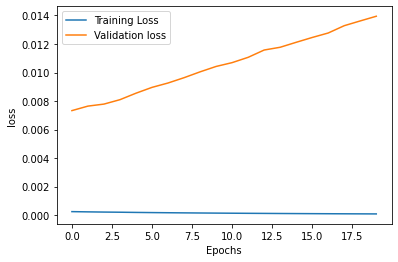

In [ ]:
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')

In [ ]:
plt.plot(h['acc'],label='Training acc')
plt.plot(h['val_acc'],label='Validation acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('acc')